<a href="https://colab.research.google.com/github/cecili0/telco_Customer_Churn/blob/main/Telco_Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Telco Customer Churn Data Analysis and Predictive Modeling using Machine Learning

## Introduction
In this notebook, we will explore the Telco Customer churn dataset. We will create and evaluate different types of predictive models to try and identify key factors in customer churn. We can hopefully use these insights to create better targeted strategies to improve customer retention.

## Import Libraries

In [299]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# Import packages
### YOUR CODE HERE ###

# For data manipulation
import numpy as np
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

# For data modeling
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score, roc_auc_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier, plot_importance
from sklearn.metrics import roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

from imblearn.combine import SMOTEENN

# For metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

# For saving models
import pickle



## Import Data

In [300]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/WA_Fn-UseC_-Telco-Customer-Churn.csv')

## Exploratory Data Analysis

In [301]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [302]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [303]:
df.describe(include='all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,3,3,3,3,3,3,2,4,NaN,6531,2
top,3186-AJIEK,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


In [304]:
#Remove customer IDs from the data set
df = df.iloc[:,1:]

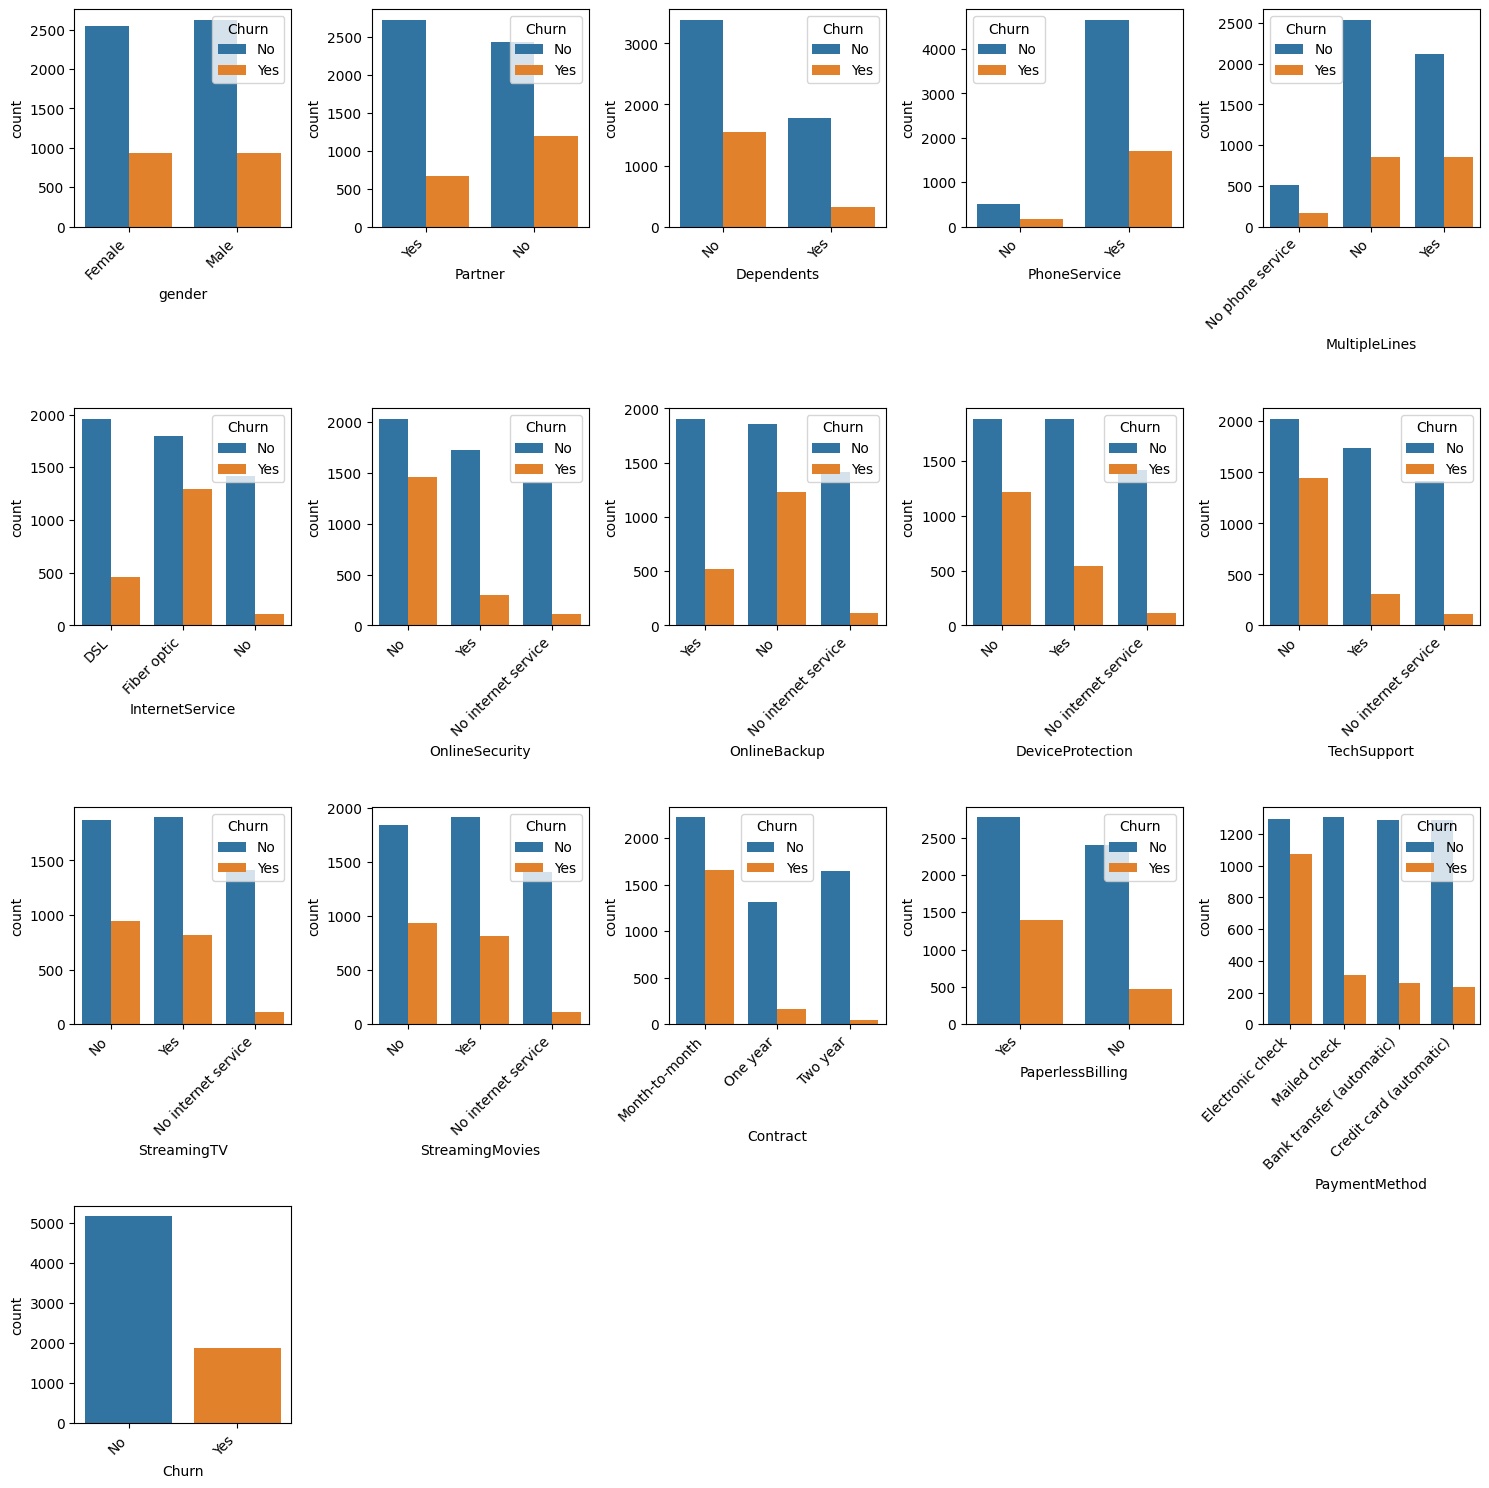

In [305]:
# Setup figure
cols = 5
rows = 4
fig = plt.figure(figsize= (15,15))

# Plotting
all_categorics = df.select_dtypes(include='object')
categoric_columns = all_categorics.columns[all_categorics.nunique()<5]
for i, col in enumerate(categoric_columns):
    ax=fig.add_subplot(rows, cols, i+1)
    sns.countplot(x=df[col], hue='Churn', data=df, ax=ax)
    plt.xticks(rotation=45, ha='right')
fig.tight_layout()
plt.show()

Some observations:
- Gender has a negligible effect on churn

Customers who churn typically:
- Have no partner
- Have no dependents
- Have phone service
- Use fiber optics for internet service
- Don't use extra services (Device protection, Online Backup, Online Security)
- Have month to month contracts
- Use paperless billing
- Pay with electronic checks

<Axes: xlabel='tenure', ylabel='Count'>

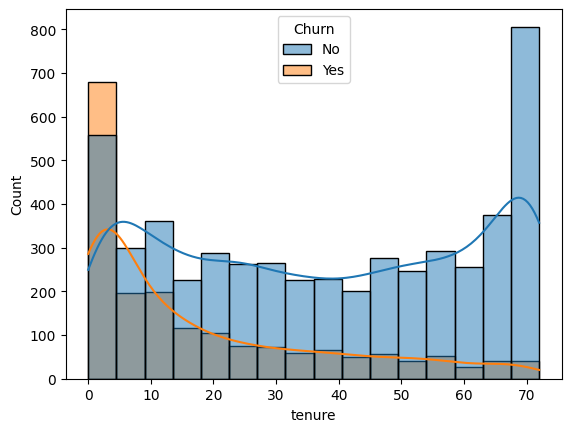

In [306]:
sns.histplot(data=df,
            x='tenure',
            hue='Churn', alpha=0.5, kde=True)

The customers with the shortest tenure tend to churn the most.

<Axes: xlabel='MonthlyCharges', ylabel='Count'>

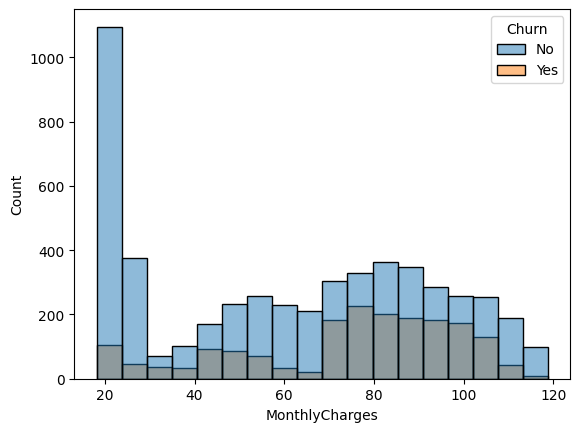

In [307]:
sns.histplot(data=df,
            x='MonthlyCharges',
            hue='Churn', alpha=0.5)

The customers that churn typically are paying 65 or more in monthly charges.

In [308]:
#Convert TotalCharges to numeric
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')

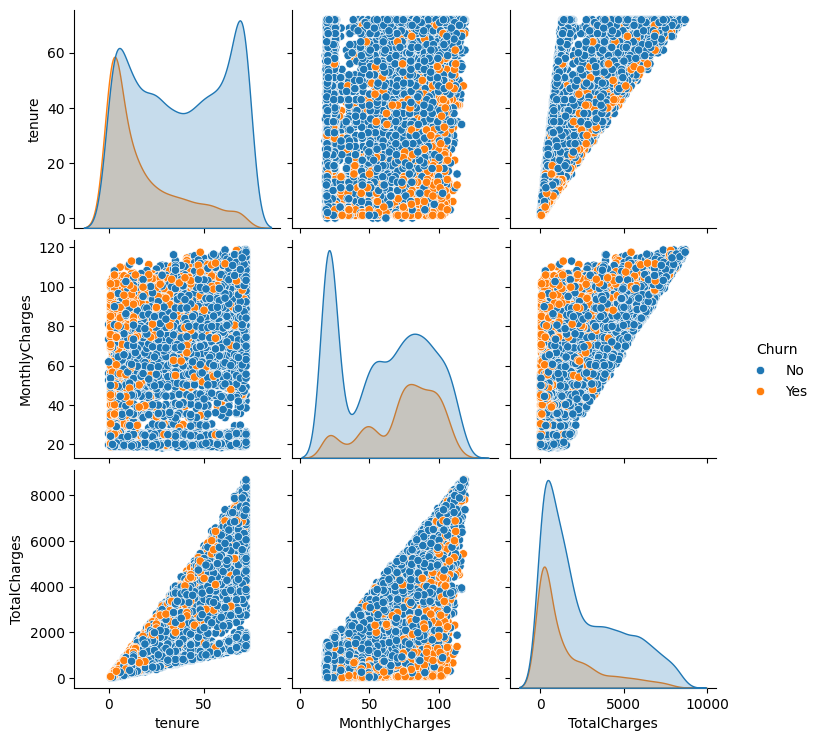

In [309]:
sns.pairplot(df,vars = ['tenure','MonthlyCharges','TotalCharges'], hue="Churn")

In [310]:
#Replace 0/1 in SeniorCitizen with No/Yes as it is a categorical variable
df['SeniorCitizen'] = df['SeniorCitizen'].replace({0: 'No', 1: 'Yes'})

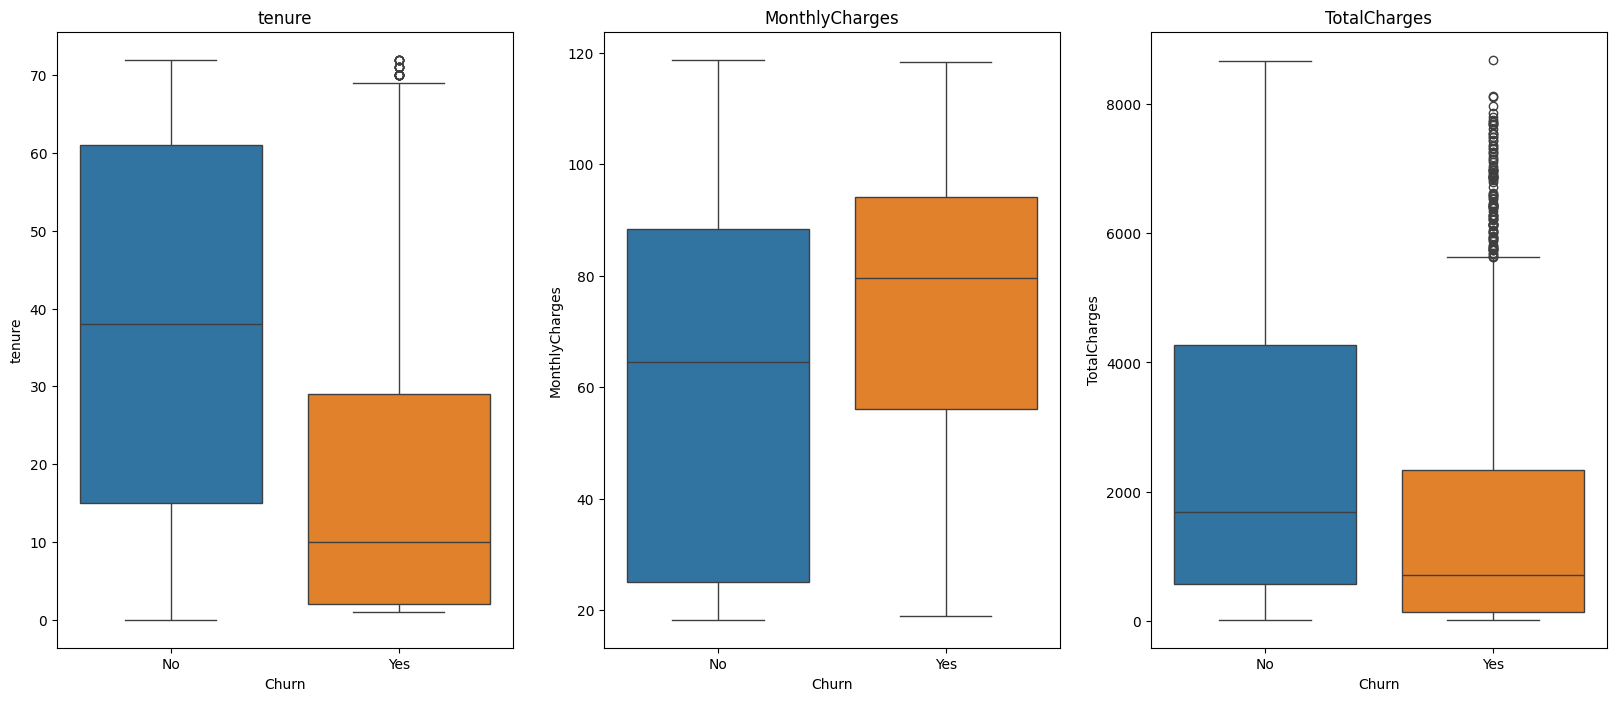

In [265]:
string_fields = [type(fld) is str for fld in df.iloc[0, :]]
all_features = [x for x in df.columns if x != 'Churn']
categorical_features = [x[1] for x in zip(string_fields, all_features) if x[0] is True ]
numerical_features = [x for x in all_features if x not in categorical_features]
color = ('#40DFEF', '#E78EA9')
fig, ax = plt.subplots(1, 3, figsize=(20,8))
for i, p in enumerate(numerical_features) :
        sns.boxplot(data=df, x='Churn', y=p, ax=ax[i], hue='Churn')
        ax[i].set_title(p)


Customers that churn have a much lower median tenure, higher median monthly charges and lower median total charges.

## Data Preprocessing and Feature Engineering

In [266]:
#Check missing values
df.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


There are 11 missing values under the TotalCharges column, let's look deeper to see what's going on.

In [267]:
df[np.isnan(df['TotalCharges'])]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,No,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,No,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,No,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,No,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,No,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


All the faulty rows also have a tenure value of 0. It's likely these are client who have signed up but have not been charged yet. In this case, we will simply drop these rows from our dataset.

In [268]:
#Removing missing values
df.dropna(inplace = True)

df2 = df

Some columns are related MultipleLines with PhoneService and StreamingTV with StreamingMovies. We will will combine related columns to try and simplify our model and hopefully improve predictive scores.

In [269]:
df2["StreamingService"] = df2.apply(lambda x:
                                  "FullService"
                                  if x['StreamingTV'] == 'Yes' and x['StreamingMovies'] == 'Yes'
                                  else
                                  "TV"
                                  if x['StreamingTV'] == 'Yes' and x['StreamingMovies'] == 'No'
                                  else
                                  "Movies"
                                  if x['StreamingTV'] == 'No' and x['StreamingMovies'] == 'Yes'
                                  else
                                  "No",
                                  axis=1
                                  )
df2["StreamingService"].unique()

array(['No', 'FullService', 'TV', 'Movies'], dtype=object)

In [270]:
df2["SecurityService"] = df2.apply(lambda x:
                                  "FullSecurity"
                                  if x['OnlineSecurity'] == 'Yes' and x['DeviceProtection'] == 'Yes'
                                  else
                                  "OnlineSecurity"
                                  if x['OnlineSecurity'] == 'Yes' and x['DeviceProtection'] == 'No'
                                  else
                                  "DeviceProtection"
                                  if x['OnlineSecurity'] == 'No' and x['DeviceProtection'] == 'Yes'
                                  else
                                  "No",
                                  axis=1
                                  )
df2["SecurityService"].unique()

array(['No', 'FullSecurity', 'OnlineSecurity', 'DeviceProtection'],
      dtype=object)

In [271]:
#Drop the original features
drop_features = ['MultipleLines', 'StreamingTV', 'StreamingMovies', 'OnlineSecurity', 'DeviceProtection']
df2.drop(drop_features, axis=1, inplace=True)

### One Hot Encode Categorical Columns

In [272]:
#One hot encode non numeric columns
df_dummies = pd.get_dummies(df2, drop_first=True,)
df_dummies = df_dummies.rename(columns={"Churn_Yes": "Churn"})
df_dummies.head()

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,InternetService_Fiber optic,InternetService_No,OnlineBackup_No internet service,OnlineBackup_Yes,TechSupport_No internet service,TechSupport_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn,StreamingService_Movies,StreamingService_No,StreamingService_TV,SecurityService_FullSecurity,SecurityService_No,SecurityService_OnlineSecurity
0,1,29.85,29.85,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False,True,False,False,True,False
1,34,56.95,1889.50,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,True,False,False
2,2,53.85,108.15,True,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,True,True,False,True,False,False,False,True
3,45,42.30,1840.75,True,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,True,False,True,False,False
4,2,70.70,151.65,False,False,False,False,True,True,False,False,False,False,False,False,False,True,False,True,False,True,False,True,False,False,True,False


### Plotting the Correlation Chart

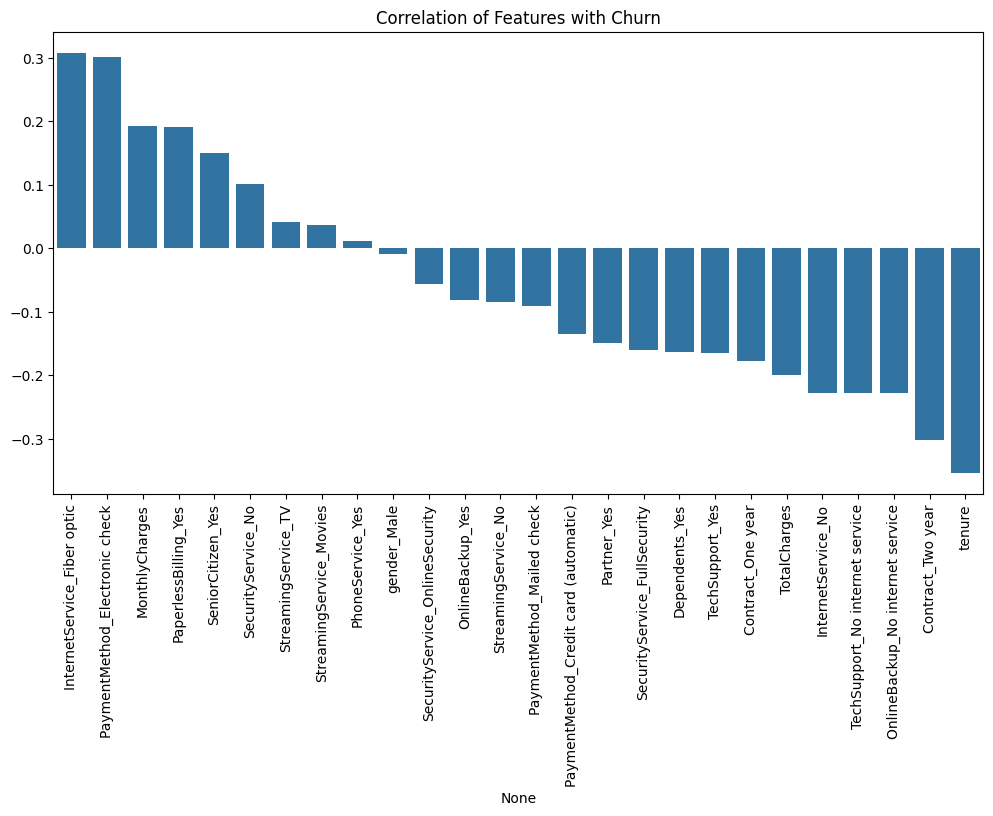

In [273]:
plt.figure(figsize=(12, 6))
churn_corr = df_dummies.corr()['Churn'].sort_values(ascending=False)
churn_corr = churn_corr.drop('Churn')  # Drop correlation with itself
sns.barplot(x=churn_corr.index, y=churn_corr.values)
plt.xticks(rotation=90)
plt.title('Correlation of Features with Churn')
plt.show()


### Training/Testing splits

In [274]:
y = df_dummies['Churn']
X = df_dummies.drop('Churn', axis=1)

In [275]:
## Drop the columns with little correlation
X.drop(columns=['gender_Male', 'PhoneService_Yes'])

,tenure,MonthlyCharges,TotalCharges,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,InternetService_Fiber optic,InternetService_No,OnlineBackup_No internet service,OnlineBackup_Yes,TechSupport_No internet service,TechSupport_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,StreamingService_Movies,StreamingService_No,StreamingService_TV,SecurityService_FullSecurity,SecurityService_No,SecurityService_OnlineSecurity
0,1,29.85,29.85,False,True,False,False,False,False,True,False,False,False,False,True,False,True,False,False,True,False,False,True,False
1,34,56.95,1889.50,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False,True,False,False
2,2,53.85,108.15,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,True,False,False,False,True
3,45,42.30,1840.75,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,True,False,True,False,False
4,2,70.70,151.65,False,False,False,True,False,False,False,False,False,False,False,True,False,True,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,24,84.80,1990.50,False,True,True,False,False,False,False,False,True,True,False,True,False,False,True,False,False,False,True,False,False
7039,72,103.20,7362.90,False,True,True,True,False,False,True,False,False,True,False,True,True,False,False,False,False,False,False,False,False
7040,11,29.60,346.45,False,True,True,False,False,False,False,False,False,False,False,True,False,True,False,False,True,False,False,False,True
7041,4,74.40,306.60,True,True,False,True,False,False,False,False,False,False,False,True,False,False,True,False,True,False,False,True,False


In [276]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=321)

In [277]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [278]:
X_train.shape

(5625, 26)

In [279]:
df_dummies['Churn'].value_counts(normalize=True)

,proportion
Churn,
False,0.734215
True,0.265785


To improve model accuracy, we will use the SMOTE-ENN sampling method to better balance the classes.

In [280]:
sm = SMOTEENN()
X_train, y_train = sm.fit_resample(X_train, y_train)

In [281]:
X_train.shape

(5003, 26)

In [282]:
y_train.value_counts(normalize=True)

,proportion
Churn,
True,0.558865
False,0.441135


The y_train dataset tracks the number of churned clients. We can see that after using the SMOTE-ENN sampling method, the class proportions are much closer to a 50/50 class balance.

## Building the Predictive Models


#### Helper Functions

In [283]:
def get_scores(model_name:str, model, X_test_data, y_test_data):
  model_preds = model.predict(X_test)
  model_proba = model.predict_proba(X_test)[:,1]

  auc = roc_auc_score(y_test, model_preds)
  accuracy = accuracy_score(y_test, model_preds)
  precision = precision_score(y_test, model_preds)
  recall = recall_score(y_test, model_preds)
  f1 = f1_score(y_test, model_preds)

  model_scores = pd.DataFrame({'model': [model_name],
                            'precision': [precision],
                            'recall': [recall],
                            'f1': [f1],
                            'accuracy': [accuracy],
                            'AUC': [auc]
                          })
  # plot the model evaluation
  fig, ax = plt.subplots(figsize=(10,7))
  fpr, tpr, _ = roc_curve(y_test, model_proba)

  plt.title(model_name + ' ROC curve')
  plt.xlabel("False Positive Rate")
  plt.ylabel("True Positive Rate")
  plt.plot(fpr,tpr)
  plt.plot((0,1), linestyle="--",color='black')
  plt.show()

  return model_scores

In [284]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, accuracy, or auc

    Returns a pandas df with the F1, recall, precision, accuracy, and auc scores
    for the model with the best mean 'metric' score across all validation folds.
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'auc': 'mean_test_roc_auc',
                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy'
                  }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

    # Create table of results
    table = pd.DataFrame()
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'f1': [f1],
                          'accuracy': [accuracy],
                          'AUC': [auc]
                        })

    return table

In [285]:
def write_pickle(path, model_object, save_as:str):
    '''
    In:
        path:         path of folder where you want to save the pickle
        model_object: a model you want to pickle
        save_as:      filename for how you want to save the model

    Out: A call to pickle the model in the folder indicated
    '''

    with open(path + save_as + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)

In [286]:
def read_pickle(path, saved_model_name:str):
    '''
    In:
        path:             path to folder where you want to read from
        saved_model_name: filename of pickled model you want to read in

    Out:
        model: the pickled model
    '''
    with open(path + saved_model_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)

    return model

### Logistic Regression

In [287]:
# Construct a logistic regression model and fit it to the training dataset
log_clf = LogisticRegression(random_state=234, max_iter=500).fit(X_train, y_train)

In [288]:
# Use the logistic regression model to get predictions on the test set
y_pred = log_clf.predict(X_test)

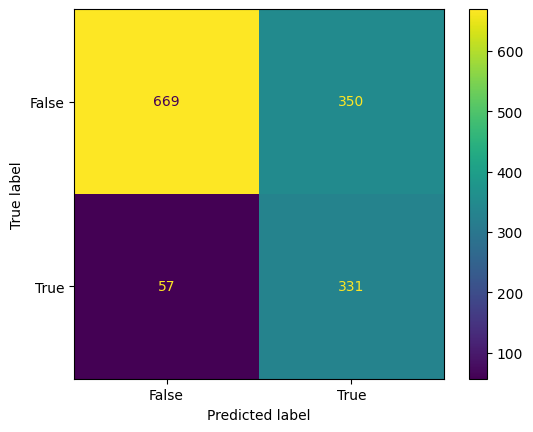

In [289]:
# Compute values for confusion matrix
log_cm = confusion_matrix(y_test, y_pred, labels=log_clf.classes_)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm,
                                  display_labels=log_clf.classes_)

# Plot confusion matrix
log_disp.plot(values_format='')

# Display plot
plt.show()



* Upper Left displays True Negatives (TN)
* Upper Right displays False Positives (FP)
* Bottm Left displays False Negatives (FN)
* Bottom Right displays True Positives (TP)


Let's now create a classification report that includes precision, recall, f1-score, and accuracy metrics to evaluate the performance of the logistic regression model.

In [290]:
# Create classification report for logistic regression model
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_test, y_pred, target_names=target_names))


                           precision    recall  f1-score   support

Predicted would not leave       0.92      0.66      0.77      1019
    Predicted would leave       0.49      0.85      0.62       388

                 accuracy                           0.71      1407
                macro avg       0.70      0.75      0.69      1407
             weighted avg       0.80      0.71      0.73      1407



- Precision: The proportion of all the model's positive classifications that are actually positive  $$\frac {TP}{TP + FP}$$
- Recall: The proportion of all actual positives that were classified correctly as positives  $$\frac {TP}{TP + FN}$$

For telecom companies analyzing customer churn, it's expected that recall will be prioritized, since we would want to accurately identify customers that would actually leave. This would allow them to apply targeted retention strategies and in that case, false positives, or those who would stay anyways don't factor as much in scoring our predictions.

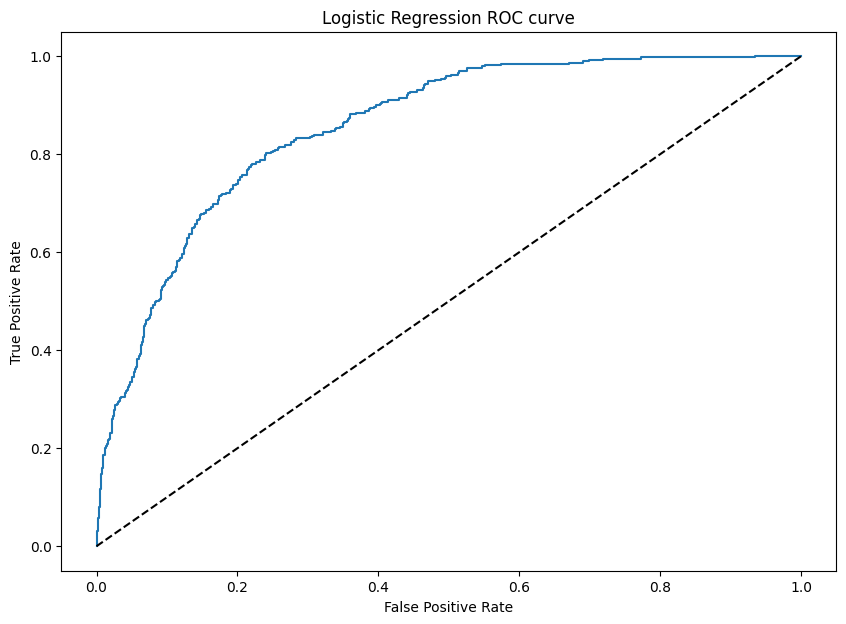

,model,precision,recall,f1,accuracy,AUC
0,Logistic Regression,0.48605,0.853093,0.61927,0.710732,0.754809


In [291]:
logreg_scores = get_scores('Logistic Regression', log_clf, X_test, y_test)
logreg_scores

### Decision Tree Model

In [292]:
# Instantiate model
tree = DecisionTreeClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [ 1, 3, 5, 7, 9],
             'min_samples_split': [2, 4, 6]
             }

# Assign a dictionary of scoring metrics to capture
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# Instantiate GridSearch
tree1 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [293]:
%%time
tree1.fit(X_train, y_train)

CPU times: user 9.1 s, sys: 20.2 ms, total: 9.12 s
Wall time: 10.3 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [1, 3, 5, 7, 9],
                         'min_samples_split': [2, 4, 6]},
             refit='roc_auc',
             scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

In [294]:
tree1.best_params_

{'max_depth': 8, 'min_samples_leaf': 9, 'min_samples_split': 2}

In [295]:
# Check best AUC score on CV
tree1.best_score_

np.float64(0.9657503603865938)

In [296]:
# Get all CV scores
tree1_cv_results = make_results('decision tree cv', tree1, 'auc')
tree1_cv_results


,model,precision,recall,f1,accuracy,AUC
0,decision tree cv,0.914656,0.93133,0.922874,0.913056,0.96575


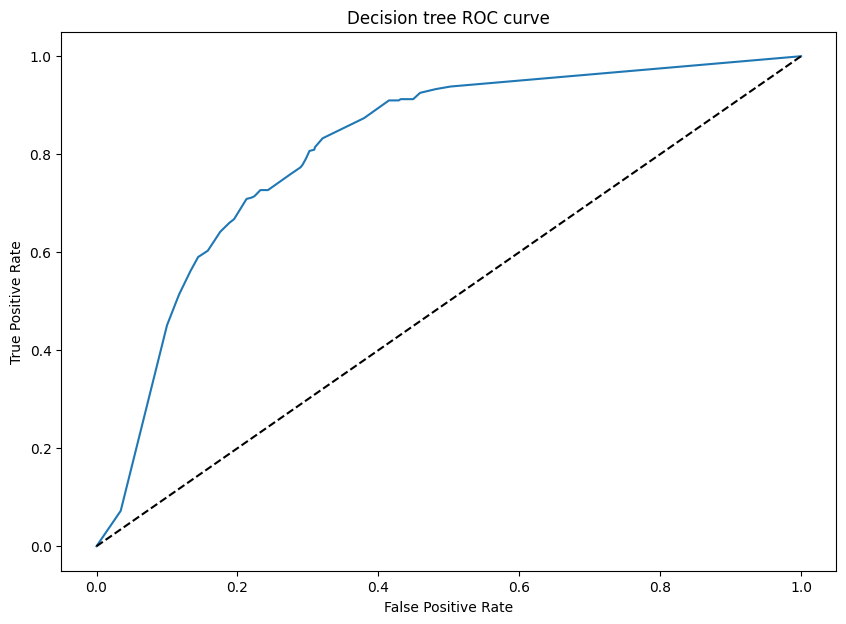

,model,precision,recall,f1,accuracy,AUC
0,Decision tree,0.499205,0.809278,0.617502,0.723525,0.750076


In [297]:
tree1_scores = get_scores('Decision tree', tree1, X_test, y_test)
tree1_scores

### Random Forest

In [ ]:
# Instantiate model
rf = RandomForestClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth': [3,5, None],
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }

# Assign a dictionary of scoring metrics to capture
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# Instantiate GridSearch
rf1 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [ ]:
%%time
rf1.fit(X_train, y_train)

CPU times: user 15min 43s, sys: 1.87 s, total: 15min 45s
Wall time: 15min 50s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [3, 5, None], 'max_features': [1.0],
                         'max_samples': [0.7, 1.0],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [300, 500]},
             refit='roc_auc',
             scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

In [298]:
path = '/content/drive/MyDrive/Colab Notebooks/Data/'

In [ ]:
write_pickle(path, rf1, 'model_randforest1')

In [ ]:
rf1 = read_pickle(path, 'model_randforest1')

In [ ]:
rf1.best_score_

np.float64(0.9990799313068361)

In [ ]:
rf1.best_params_

{'max_depth': None,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 300}

In [ ]:
# Get all CV scores
rf1_cv_results = make_results('random forest cv', rf1, 'auc')
print(tree1_cv_results)
print(rf1_cv_results)

              model  precision    recall        f1  accuracy       AUC
0  decision tree cv   0.908076  0.941098  0.924198   0.91343  0.965685
              model  precision    recall       f1  accuracy      AUC
0  random forest cv   0.987608  0.991361  0.98945  0.989042  0.99908


The random forest model had scores better across the board compared to the decision tree.

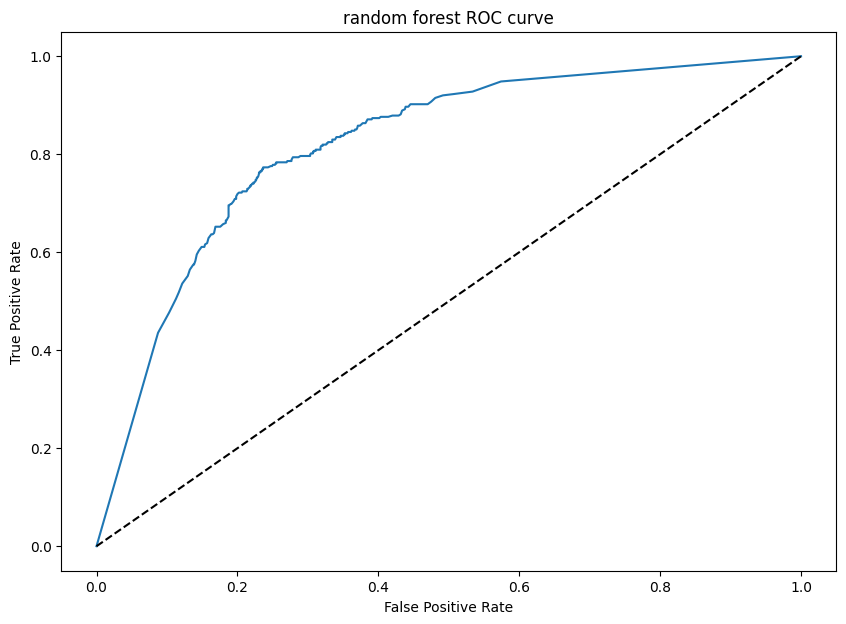

In [ ]:
rf1_scores = get_scores('random forest', rf1, X_test, y_test)

### XGBoost Model

In [ ]:
XG_model= XGBClassifier()

In [ ]:
%%time
XG_model.fit(X_train, y_train)

CPU times: user 631 ms, sys: 17.5 ms, total: 649 ms
Wall time: 400 ms


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/Data/'
write_pickle(path, XG_model, 'model_XGBoost1')

In [ ]:
XG_model = read_pickle(path, 'model_XGBoost1')

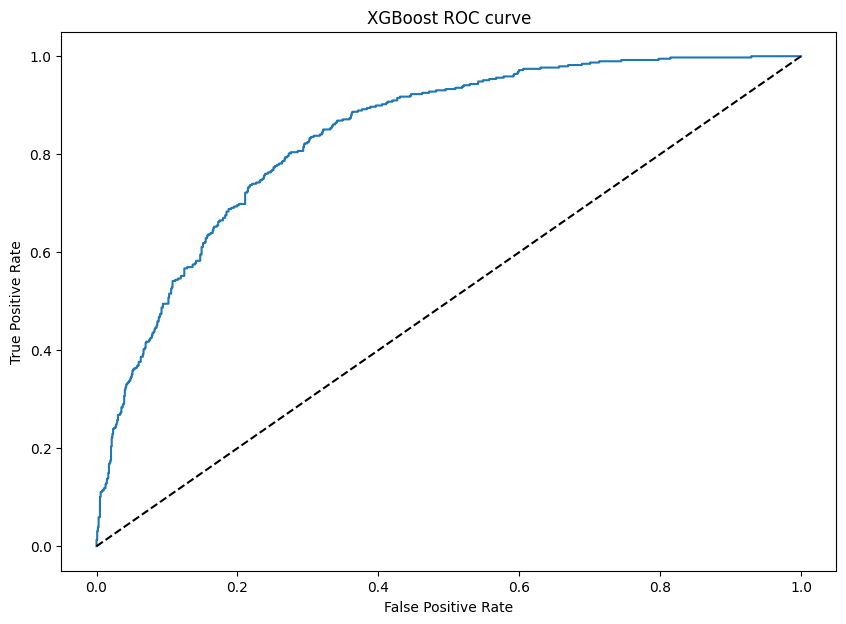

,model,precision,recall,f1,accuracy,AUC
0,XGBoost,0.542125,0.762887,0.633833,0.75693,0.758774


In [ ]:
XGB_scores = get_scores('XGBoost', XG_model, X_test, y_test)
XGB_scores

These scores are comparable to our random forest and logistic regression models.

### K-Nearest Neighbours

In [ ]:
KNN_model = KNeighborsClassifier()

In [ ]:
KNN_model = KNN_model.fit(X_train, y_train)

In [ ]:
KNN_pred = KNN_model.predict(X_test)
KNN_prob = KNN_model.predict_proba(X_test)[:,1]

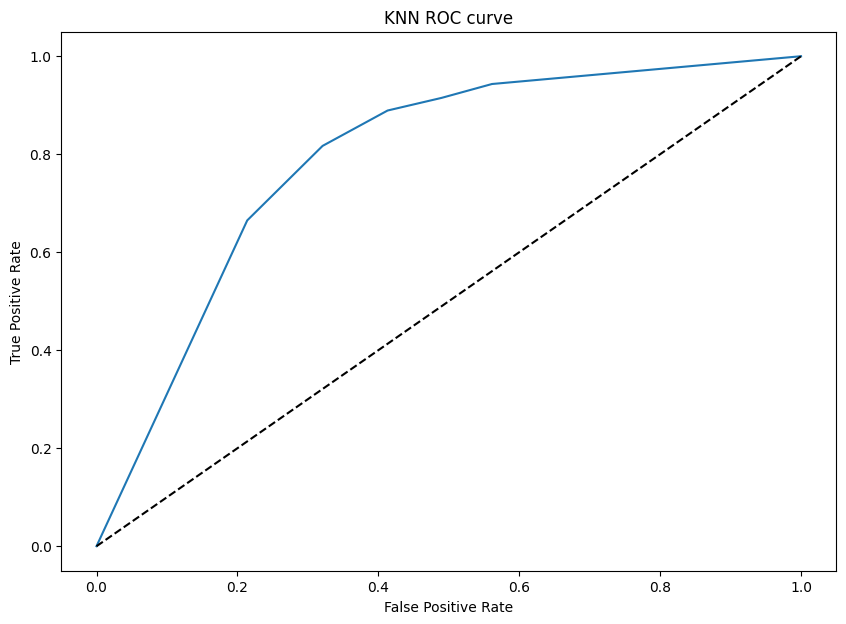

,model,precision,recall,f1,accuracy,AUC
0,KNN,0.450392,0.889175,0.59792,0.67022,0.738013


In [ ]:
KNN_scores = get_scores('KNN', KNN_model, X_test, y_test)
KNN_scores

### Support Vector Machines

In [ ]:
SVC_model = SVC(kernel='rbf',
                C=51,
                gamma=1,
                probability=True)

In [ ]:
SVC_model = SVC_model.fit(X_train, y_train)

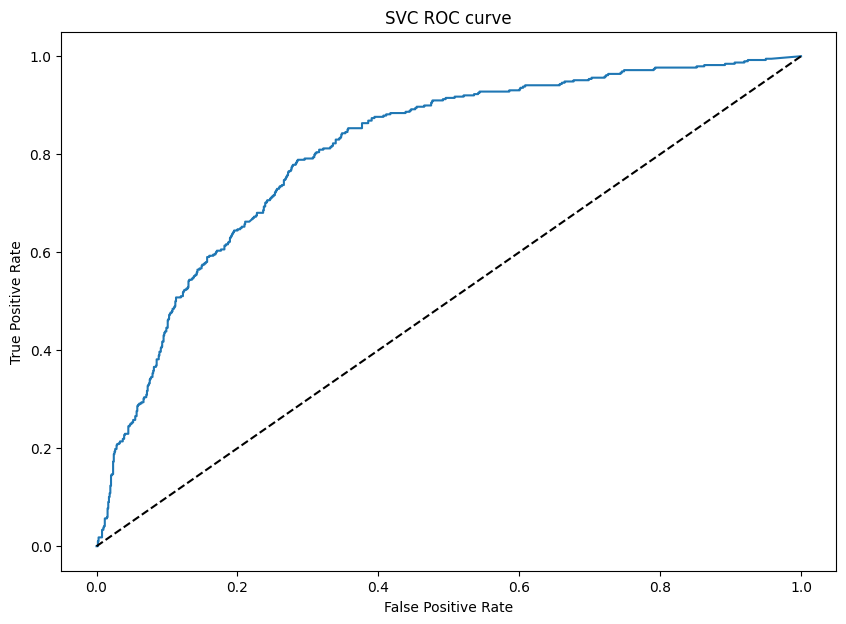

,model,precision,recall,f1,accuracy,AUC
0,SVC,0.523901,0.706186,0.601537,0.742004,0.730914


In [ ]:
SVC_scores = get_scores('SVC', SVC_model, X_test, y_test)
SVC_scores

## Comparing Model Performance on Test Set


In [ ]:
combined_results = pd.concat([SVC_scores, XGB_scores, KNN_scores, rf1_scores, tree1_scores], ignore_index=True)
combined_results


,model,precision,recall,f1,accuracy,AUC
0,SVC,0.523901,0.706186,0.601537,0.742004,0.730914
1,XGBoost,0.542125,0.762887,0.633833,0.756930,0.758774
2,KNN,0.450392,0.889175,0.597920,0.670220,0.738013
3,random forest,0.523156,0.786082,0.628218,0.743426,0.756633
4,Decision tree,0.496825,0.806701,0.614931,0.721393,0.747806


Reviewing the results, all models are almost identical except for KNN, which has a higher recall with the downside of lower precision. This result leads to a lower overall accuracy for the KNN model. With these results in mind, we will perform further tuning on the XGBoost and the Decision Tree model. These two were chosen because of the combination of their recall, f1 and AUC scores.

### Tuning XGBoost

In [ ]:
# import packages for hyperparameters tuning
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
import xgboost as xgb

space={'max_depth': hp.quniform("max_depth", 3, 18, 1),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': 180,
        'seed': 0
    }

def objective(space):
    clf= xgb.XGBClassifier(
                    n_estimators =space['n_estimators'], \
                    max_depth = int(space['max_depth']), gamma = space['gamma'],
                    reg_alpha = int(space['reg_alpha']),\
                    min_child_weight=int(space['min_child_weight']),
                    colsample_bytree=int(space['colsample_bytree']),
                    eval_metric="auc",
                    early_stopping_rounds=10)

    evaluation = [( X_train, y_train), ( X_test, y_test)]

    clf.fit(X_train, y_train,
            eval_set=evaluation,
            verbose=False)


    pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred>0.5)
    print ("SCORE:", accuracy)
    return {'loss': -accuracy, 'status': STATUS_OK }

In [ ]:
trials = Trials()

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)

SCORE:
0.6481876332622601
SCORE:
0.6261549395877755
SCORE:
0.6318407960199005
SCORE:
0.6986496090973703
SCORE:
0.7107320540156361
SCORE:
0.6744847192608386
SCORE:
0.7093105899076049
SCORE:
0.6844349680170576
SCORE:
0.6695095948827292
SCORE:
0.6467661691542289
SCORE:
0.6197583511016347
SCORE:
0.6190476190476191
SCORE:
0.6709310589907604
SCORE:
0.6403695806680881
SCORE:
0.6631130063965884
SCORE:
0.6631130063965884
SCORE:
0.6652452025586354
SCORE:
0.7107320540156361
SCORE:
0.7107320540156361
SCORE:
0.6986496090973703
SCORE:
0.6687988628287136
SCORE:
0.7100213219616205
SCORE:
0.6730632551528074
SCORE:
0.668088130774698
SCORE:
0.7100213219616205
SCORE:
0.6744847192608386
SCORE:
0.7107320540156361
SCORE:
0.668088130774698
SCORE:
0.6716417910447762
SCORE:
0.6744847192608386
SCORE:
0.6396588486140725
SCORE:
0.7100213219616205
SCORE:
0.644633972992182
SCORE:
0.6133617626154939
SCORE:
0.6844349680170576
SCORE:
0.6730632551528074
SCORE:
0.6666666666666666
SCORE:
0.6332622601279317
SCORE:
0.671641

In [ ]:
best_hyperparams['max_depth'] = int(best_hyperparams['max_depth'])
best_hyperparams['min_child_weight'] = int(best_hyperparams['min_child_weight'])

In [ ]:
xgb_tuned_model = xgb.XGBClassifier(**best_hyperparams)
xgb_tuned_model = xgb_tuned_model.fit(X_train, y_train)

In [ ]:
write_pickle(path, xgb_tuned_model, 'model_XGBoost2')

In [ ]:
xgb_tuned_model = read_pickle(path, 'model_XGBoost2')

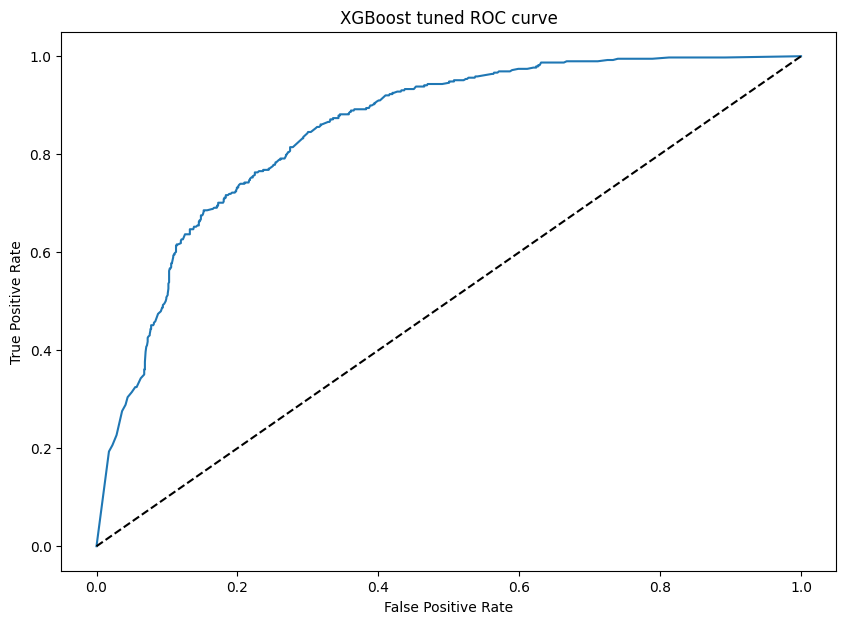

,model,precision,recall,f1,accuracy,AUC
0,XGBoost tuned,0.499261,0.871134,0.634742,0.723525,0.769227
1,SVC,0.523901,0.706186,0.601537,0.742004,0.730914
2,XGBoost,0.542125,0.762887,0.633833,0.756930,0.758774
3,KNN,0.450392,0.889175,0.597920,0.670220,0.738013
4,random forest,0.523156,0.786082,0.628218,0.743426,0.756633
5,Decision tree,0.496825,0.806701,0.614931,0.721393,0.747806


In [ ]:
xgb_tuned_scores = get_scores('XGBoost tuned', xgb_tuned_model, X_test, y_test)
combined_tuned_results = pd.concat([xgb_tuned_scores, combined_results], ignore_index=True)
combined_tuned_results

The tuned XGBoost has the highest AUC and f1 score.

### Tuning Decision Tree

We will expand the search space of GridSearchCV in an attempt to find better parameters that will maximize classification performance.

In [ ]:
# Instantiate model
tree = DecisionTreeClassifier(random_state=123)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth':[2, 4, 6, 8, 10, None],
             'min_samples_leaf': [i for i in range(1, 15)],
             'min_samples_split': [i for i in range(2, 15)]
             }

# Assign a dictionary of scoring metrics to capture
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

tree2 = GridSearchCV(tree, cv_params, scoring=scoring, refit='roc_auc')
tree2.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=123),
             param_grid={'max_depth': [2, 4, 6, 8, 10, None],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                               12, 13, 14]},
             refit='roc_auc',
             scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

In [ ]:
write_pickle(path, tree2, 'tree2')

In [ ]:
tree2 = read_pickle(path, 'tree2')

<Axes: >

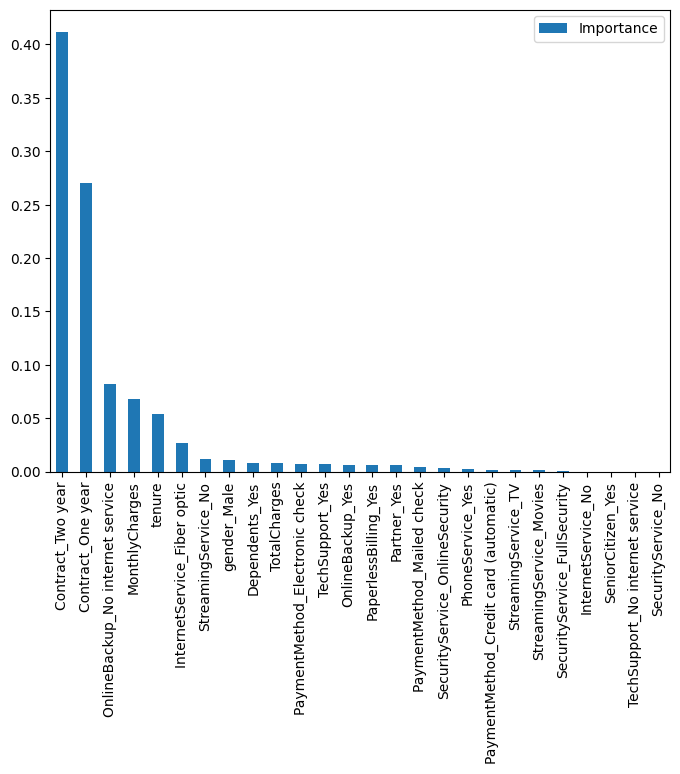

In [ ]:
tree.set_params(**tree2.best_params_)
tree.fit(X_train, y_train)

columns_idx = df_dummies.columns.tolist()
columns_idx.remove('Churn')

feat_importances = pd.DataFrame(tree.feature_importances_, index= columns_idx, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances.plot(kind='bar', figsize=(8,6))

According to the decision tree, the factors with the largest effect on churn are the contract type, monthly charges, and tenure.

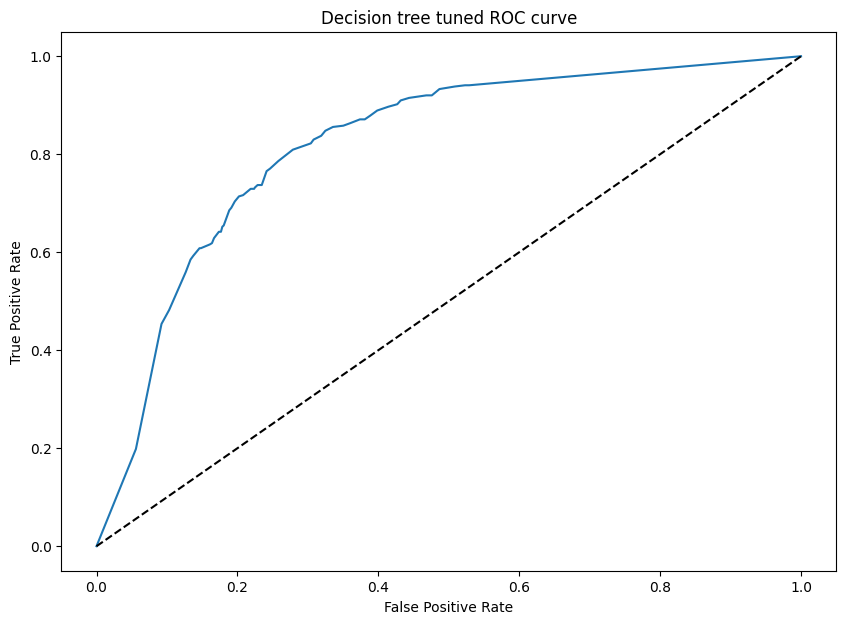

,model,precision,recall,f1,accuracy,AUC
0,Decision tree tuned,0.506289,0.829897,0.628906,0.729922,0.760876
1,XGBoost tuned,0.499261,0.871134,0.634742,0.723525,0.769227
2,SVC,0.523901,0.706186,0.601537,0.742004,0.730914
3,XGBoost,0.542125,0.762887,0.633833,0.756930,0.758774
4,KNN,0.450392,0.889175,0.597920,0.670220,0.738013
5,random forest,0.523156,0.786082,0.628218,0.743426,0.756633
6,Decision tree,0.496825,0.806701,0.614931,0.721393,0.747806


In [ ]:
tuned_decision_tree = get_scores('Decision tree tuned', tree2, X_test, y_test)
combined_tuned_results = pd.concat([tuned_decision_tree, combined_tuned_results], ignore_index=True)
combined_tuned_results

There is a marginal improvement in the decision tree model after further tuning, although recall is still worse than the tuned XGBoost model.

## Analyzing Best Performing Model: Tuned XGBoost

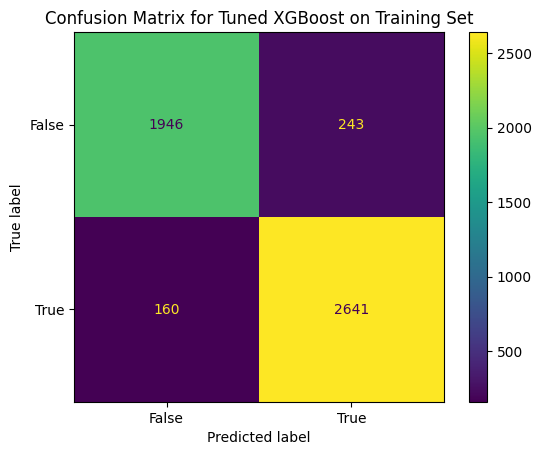

In [ ]:
y_pred = xgb_tuned_model.predict(X_train)

# Compute values for confusion matrix
xgb_tuned_cm = confusion_matrix(y_train, y_pred, labels=log_clf.classes_)

# Create display of confusion matrix
xgb_tuned_disp = ConfusionMatrixDisplay(confusion_matrix=xgb_tuned_cm,
                                  display_labels=log_clf.classes_)

# Plot confusion matrix
xgb_tuned_disp.plot(values_format='')
plt.title('Confusion Matrix for Tuned XGBoost on Training Set')

# Display plot
plt.show()

On the training set, we observe that the model has a high True Proportion Rate and True Negative Rate.

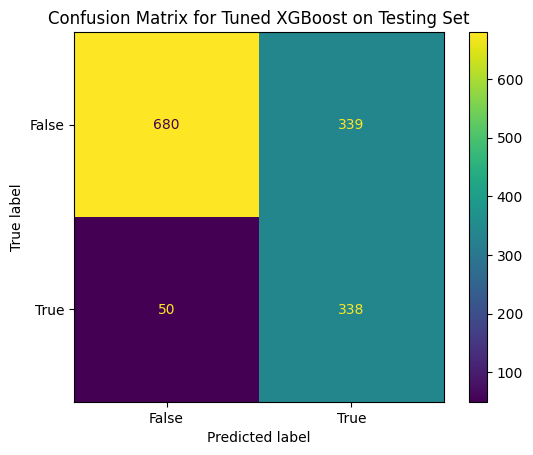

In [ ]:
y_pred = xgb_tuned_model.predict(X_test)

# Compute values for confusion matrix
xgb_tuned_cm = confusion_matrix(y_test, y_pred, labels=log_clf.classes_,)

# Create display of confusion matrix
xgb_tuned_disp = ConfusionMatrixDisplay(confusion_matrix=xgb_tuned_cm,
                                  display_labels=log_clf.classes_)

# Plot confusion matrix
xgb_tuned_disp.plot(values_format='')
plt.title('Confusion Matrix for Tuned XGBoost on Testing Set')

# Display plot
plt.show()

On the testing set, the high True Positive rate is maintained, but we also see quite a large amount of False Positives. We also notice that the model predicts True/False at about a 50/50 rate, which would match our training set after upsampling to balance the classes. This was done to avoid problems with class imbalances.

The difference can likely be explained by the technique used to balance the classes. During SMOTE-ENN our training set went from 5625 to 4990 rows, and a ~75/25 split to ~55/44 split. There was data lost from the majority NoChurn class, which would likely result in decreased accuracy. However, this technique was done because the belief is that False Negatives are more costly than False Positives.

## Conclusion

We started off analyzing the Telco Customer Churn dataset. We performed data cleaning and data analysis to explore client demographics and find trends in the data. From there we went on to build 6 predictive models and further trained the two best perfoming models (XGBoost and Decision Tree). After further tuning, we were able to achieve 87% recall score using the tuned XGBoost model. However, the cost of improving the True Positive Rate was a decline in precision, which remained at ~50%. Only about half of clients predicted to churn in the test dataset would actually end up churning. Compared to the much higher scores across the board on the training dataset, this is a strong sign of overfitting.


In practice, more data would be needed to refine our predictive models. There are tradeoffs in recall and precision we need to consider. Depending on the cost of False Positives and False Negatives, these factors would all weigh in to tuning our model.